<a href="https://colab.research.google.com/github/TimeKP/AI-study-contents/blob/main/Section2_project_5nm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [340]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AI_bootcamp/Section2-Machine Learning/Project/5nm_split.csv')

In [341]:
df.head()

,-50,90,105,120,135,150,165,180,195,210,...,165.30,180.30,195.30,210.30,225.30,240.30,255.30,270.30,285.30,300.30
0,0,2.817602e-19,1.408801e-18,3.571725e-18,2.618712e-18,1.392227e-18,1.044170e-18,3.364548e-18,1.085605e-18,1.085605e-18,...,2.900472e-18,3.331400e-18,2.900472e-19,3.596586e-18,7.872711e-19,9.612994e-19,1.102179e-18,1.731996e-18,7.706969e-19,2.270656e-18
1,20,1.932121e-14,1.844013e-13,6.890404e-14,1.965948e-13,1.120983e-13,1.305983e-13,2.035452e-13,1.981429e-13,6.028474e-13,...,2.463984e-14,2.827082e-14,8.051007e-14,6.399702e-14,2.617080e-14,1.234806e-14,1.398152e-13,8.507003e-14,6.369678e-14,1.053369e-13
2,40,3.847551e-14,4.562501e-14,1.214386e-13,1.186600e-13,3.075793e-14,1.113466e-13,2.618223e-13,1.691290e-13,5.754554e-13,...,2.499693e-14,8.344825e-14,1.386185e-13,9.323195e-14,1.414925e-13,9.141875e-14,4.596287e-14,8.143060e-14,5.040209e-14,5.254247e-13
3,60,7.754090e-14,1.509157e-13,1.119997e-13,2.642289e-14,2.038212e-14,2.002420e-14,1.379564e-13,3.323328e-13,1.095028e-12,...,1.092426e-13,9.220187e-14,1.457371e-13,8.963537e-14,7.123544e-14,1.658183e-13,1.966371e-14,7.240408e-17,3.293437e-13,6.196470e-13
4,80,1.758366e-13,3.466346e-14,1.001309e-13,2.931590e-13,3.441518e-13,1.718397e-13,1.831715e-13,6.416375e-13,1.494630e-12,...,2.214826e-14,7.186898e-14,1.647775e-13,1.452747e-13,3.812770e-14,3.929170e-14,1.154579e-14,3.681818e-14,2.710806e-13,6.223892e-13


In [342]:
df = df.apply(pd.to_numeric, errors='coerce') # 대문자 E 를 지수로 인식 못해서 문자형으로 출력하므로, 정수형으로 바꿔줘야함
df = df.replace(0.0, np.nan)

In [343]:
import numpy as np

# list of column names
column_names = ['Vds']

for Vg in range (-50, -19, 1) :
  for T in range (90, 315, 15) :
    name = str(Vg) + '/' + str(T)
    column_names.append(name)

#column_names

In [344]:
df.columns = column_names
len(df.columns), len(column_names)

(466, 466)

In [345]:
# feature engineering for SE, FN, DT

#def mechanisms(df) :
df_SE = df.copy()
df_FN = df.copy()
df_DT = df.copy()

df_SE.fillna(df.interpolate(), inplace = True)
df_FN.fillna(df.interpolate(), inplace = True)
df_DT.fillna(df.interpolate(), inplace = True)

df_SE = df_SE.apply(lambda x: np.log(x), axis = 1)
df_FN = df_FN.apply(lambda x: np.log(x/(x['Vds'] ** 2)), axis = 1)
df_DT = df_DT.apply(lambda x: np.log(x/(x['Vds'] ** 2)), axis = 1)

df_SE['Vds'] = np.sqrt(df['Vds'])
df_FN['Vds'] = 1/df['Vds']
df_DT['Vds'] = np.log(1/df['Vds'])

df_SE.drop([0], inplace = True)
df_SE.reset_index(drop = True, inplace = True)
df_FN.drop([0], inplace = True)
df_FN.reset_index(drop = True, inplace = True)
df_DT.drop([0], inplace = True)
df_DT.reset_index(drop = True, inplace = True)


#  return df_SE, df_FN, df_DT

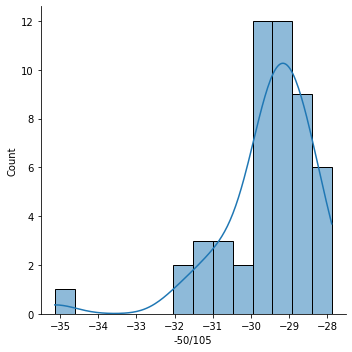

In [346]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.displot(df_SE['-50/105'], kde = True)

In [347]:
for numVds in range (0, 50, 25):
  print(numVds, numVds+24) 
  test = df_SE[['Vds']].iloc[numVds : numVds+25]
  print(test)

0 24
          Vds
0    4.472136
1    6.324555
2    7.745967
3    8.944272
4   10.000000
5   10.954451
6   11.832160
7   12.649111
8   13.416408
9   14.142136
10  14.832397
11  15.491933
12  16.124515
13  16.733201
14  17.320508
15  17.888544
16  18.439089
17  18.973666
18  19.493589
19  20.000000
20  20.493902
21  20.976177
22  21.447611
23  21.908902
24  22.360680
25 49
          Vds
25  22.803509
26  23.237900
27  23.664319
28  24.083189
29  24.494897
30  24.899799
31  25.298221
32  25.690465
33  26.076810
34  26.457513
35  26.832816
36  27.202941
37  27.568098
38  27.928480
39  28.284271
40  28.635642
41  28.982753
42  29.325757
43  29.664794
44  30.000000
45  30.331502
46  30.659419
47  30.983867
48  31.304952
49  31.622777


In [348]:
df.head()

,Vds,-50/90,-50/105,-50/120,-50/135,-50/150,-50/165,-50/180,-50/195,-50/210,...,-20/165,-20/180,-20/195,-20/210,-20/225,-20/240,-20/255,-20/270,-20/285,-20/300
0,NaN,2.817602e-19,1.408801e-18,3.571725e-18,2.618712e-18,1.392227e-18,1.044170e-18,3.364548e-18,1.085605e-18,1.085605e-18,...,2.900472e-18,3.331400e-18,2.900472e-19,3.596586e-18,7.872711e-19,9.612994e-19,1.102179e-18,1.731996e-18,7.706969e-19,2.270656e-18
1,20.0,1.932121e-14,1.844013e-13,6.890404e-14,1.965948e-13,1.120983e-13,1.305983e-13,2.035452e-13,1.981429e-13,6.028474e-13,...,2.463984e-14,2.827082e-14,8.051007e-14,6.399702e-14,2.617080e-14,1.234806e-14,1.398152e-13,8.507003e-14,6.369678e-14,1.053369e-13
2,40.0,3.847551e-14,4.562501e-14,1.214386e-13,1.186600e-13,3.075793e-14,1.113466e-13,2.618223e-13,1.691290e-13,5.754554e-13,...,2.499693e-14,8.344825e-14,1.386185e-13,9.323195e-14,1.414925e-13,9.141875e-14,4.596287e-14,8.143060e-14,5.040209e-14,5.254247e-13
3,60.0,7.754090e-14,1.509157e-13,1.119997e-13,2.642289e-14,2.038212e-14,2.002420e-14,1.379564e-13,3.323328e-13,1.095028e-12,...,1.092426e-13,9.220187e-14,1.457371e-13,8.963537e-14,7.123544e-14,1.658183e-13,1.966371e-14,7.240408e-17,3.293437e-13,6.196470e-13
4,80.0,1.758366e-13,3.466346e-14,1.001309e-13,2.931590e-13,3.441518e-13,1.718397e-13,1.831715e-13,6.416375e-13,1.494630e-12,...,2.214826e-14,7.186898e-14,1.647775e-13,1.452747e-13,3.812770e-14,3.929170e-14,1.154579e-14,3.681818e-14,2.710806e-13,6.223892e-13


In [349]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model_SE = LinearRegression() # 예측모델 인스턴스를 만들기

model_columns = column_names[1:]

coef_SE_low = pd.DataFrame(columns = ['SE: r2_low', 'SE: slope_low', 'SE: intercept_low'])
coef_SE_high = pd.DataFrame(columns = ['SE: r2_high', 'SE: slope_high', 'SE: intercept_high'])

cycle = 1

for Vds in range (0, 50, 25) :
  print(cycle)
  print(Vds, Vds+25)

  X_feature = df_SE[['Vds']].iloc[Vds : Vds+25] # make feature table (2-D)
  
  for x in model_columns :
#  print(x)
    y_target = df_SE[[x]].iloc[Vds : Vds+25] # make target vector (1-D or 2-D)
    model_SE.fit(X_feature.values, y_target) # learn (.fit)
    y_pred = model_SE.predict(X_feature.values) # predict with train data
    mae = r2_score(y_target, y_pred) # evaluate result from train data
  
    slope = model_SE.coef_ # slope by linear regression
    intercept = model_SE.intercept_ # intercept by linear regression

    if cycle == 1 :
      coef_SE_low = coef_SE_low.append({'SE: r2_low' : mae, 'SE: slope_low': slope[0,0], 'SE: intercept_low' : intercept[0]}, ignore_index = True)
    if cycle == 2 :
      coef_SE_high = coef_SE_high.append({'SE: r2_high' : mae, 'SE: slope_high': slope[0,0], 'SE: intercept_high' : intercept[0]}, ignore_index = True)
  
  cycle = cycle + 1
  print(cycle)

#coef_SE.index = model_columns
coef_SE_low.index = model_columns
coef_SE_low

1
0 25
2
2
25 50
3


,SE: r2_low,SE: slope_low,SE: intercept_low
-50/90,0.077651,0.057938,-30.691409
-50/105,0.011579,-0.030313,-29.491336
-50/120,0.139801,0.061127,-30.736420
-50/135,0.076541,0.063454,-30.990691
-50/150,0.475438,0.122541,-30.995551
...,...,...,...
-20/240,0.543283,0.133685,-31.340162
-20/255,0.658963,0.171215,-31.609180
-20/270,0.516685,0.307051,-33.846858
-20/285,0.872843,0.179656,-30.647413


In [350]:
coef_SE_high.index = model_columns
coef_SE_high

,SE: r2_high,SE: slope_high,SE: intercept_high
-50/90,0.373218,0.115322,-31.791489
-50/105,0.597449,0.227621,-35.321941
-50/120,0.635304,0.102903,-31.122259
-50/135,0.926354,0.152352,-32.338681
-50/150,0.786093,0.126978,-31.061195
...,...,...,...
-20/240,0.929714,0.124033,-31.253970
-20/255,0.961267,0.123530,-30.674363
-20/270,0.976286,0.117200,-30.015694
-20/285,0.992659,0.113128,-29.332123


In [351]:
model_FN = LinearRegression() # 예측모델 인스턴스를 만들기

model_columns = column_names[1:]

coef_FN_low = pd.DataFrame(columns = ['FN: r2_low', 'FN: slope_low', 'FN: intercept_low'])
coef_FN_high = pd.DataFrame(columns = ['FN: r2_high', 'FN: slope_high', 'FN: intercept_high'])

cycle = 1

for Vds in range (0, 50, 25) :
  print(cycle)
  print(Vds, Vds+25)

  X_feature = df_FN[['Vds']].iloc[Vds : Vds+25] # make feature table (2-D)
  
  for x in model_columns :
    
    y_target = df_FN[[x]].iloc[Vds : Vds+25] # make target vector (1-D or 2-D)
    model_FN.fit(X_feature.values, y_target) # learn (.fit)
    y_pred = model_FN.predict(X_feature.values) # predict with train data
    mae = r2_score(y_target, y_pred) # evaluate result from train data
  
    slope = model_FN.coef_ # slope by linear regression
    intercept = model_FN.intercept_ # intercept by linear regression

    if cycle == 1 :
      coef_FN_low = coef_FN_low.append({'FN: r2_low' : mae, 'FN: slope_low': slope[0,0], 'FN: intercept_low' : intercept[0]}, ignore_index = True)
    if cycle == 2 :
      coef_FN_high = coef_FN_high.append({'FN: r2_high' : mae, 'FN: slope_high': slope[0,0], 'FN: intercept_high' : intercept[0]}, ignore_index = True)
  
  cycle = cycle + 1
  print(cycle)

coef_FN_low.index = model_columns
coef_FN_low

1
0 25
2
2
25 50
3


,FN: r2_low,FN: slope_low,FN: intercept_low
-50/90,0.411959,103.927479,-41.228805
-50/105,0.476800,154.584075,-41.767212
-50/120,0.674876,128.323152,-41.411138
-50/135,0.666588,147.493304,-41.776077
-50/150,0.669038,99.425018,-40.508942
...,...,...,...
-20/240,0.500428,78.295085,-40.521592
-20/255,0.734024,88.473510,-40.293368
-20/270,0.115533,53.731197,-40.185080
-20/285,0.679756,61.619263,-38.997352


In [352]:
coef_FN_high.index = model_columns
coef_FN_high

,FN: r2_high,FN: slope_high,FN: intercept_high
-50/90,0.034495,273.810669,-42.230454
-50/105,0.145166,-755.038310,-41.273343
-50/120,0.275921,468.694647,-42.168314
-50/135,0.012114,-46.007631,-41.324464
-50/150,0.105412,224.026429,-41.112261
...,...,...,...
-20/240,0.336495,241.689518,-41.410005
-20/255,0.489812,230.340039,-40.828696
-20/270,0.741102,295.881526,-40.433294
-20/285,0.931745,335.274410,-39.915286


In [353]:
model_DT = LinearRegression() # 예측모델 인스턴스를 만들기

model_columns = column_names[1:]

coef_DT_low = pd.DataFrame(columns = ['DT: r2_low', 'DT: slope_low', 'DT: intercept_low'])
coef_DT_high = pd.DataFrame(columns = ['DT: r2_high', 'DT: slope_high', 'DT: intercept_high'])

cycle = 1

for Vds in range (0, 50, 25) :
  print(cycle)
  print(Vds, Vds+25)

  X_feature = df_DT[['Vds']].iloc[Vds : Vds+25] # make feature table (2-D)
  
  for x in model_columns :
    
    y_target = df_DT[[x]].iloc[Vds : Vds+25] # make target vector (1-D or 2-D)
    model_DT.fit(X_feature.values, y_target) # learn (.fit)
    y_pred = model_DT.predict(X_feature.values) # predict with train data
    mae = r2_score(y_target, y_pred) # evaluate result from train data
  
    slope = model_DT.coef_ # slope by linear regression
    intercept = model_DT.intercept_ # intercept by linear regression

    if cycle == 1 :
      coef_DT_low = coef_DT_low.append({'DT: r2_low' : mae, 'DT: slope_low': slope[0,0], 'DT: intercept_low' : intercept[0]}, ignore_index = True)
    if cycle == 2 :
      coef_DT_high = coef_DT_high.append({'DT: r2_high' : mae, 'DT: slope_high': slope[0,0], 'DT: intercept_high' : intercept[0]}, ignore_index = True)
  
  cycle = cycle + 1
  print(cycle)

coef_DT_low.index = model_columns
coef_DT_low

1
0 25
2
2
25 50
3


,DT: r2_low,DT: slope_low,DT: intercept_low
-50/90,0.632768,1.593954,-31.962375
-50/105,0.611517,2.166463,-29.070789
-50/120,0.756014,1.680771,-31.497017
-50/135,0.613279,1.750746,-31.343672
-50/150,0.708590,1.266246,-33.018929
...,...,...,...
-20/240,0.713716,1.157116,-33.772965
-20/255,0.595917,0.986510,-34.373980
-20/270,0.013432,0.226726,-38.569762
-20/285,0.871183,0.863267,-33.938059


In [354]:
coef_DT_high.index = model_columns
coef_DT_high

,DT: r2_high,DT: slope_high,DT: intercept_high
-50/90,0.041413,0.417904,-39.091986
-50/105,0.152361,-1.077471,-49.432245
-50/120,0.249463,0.620773,-37.421619
-50/135,0.012799,-0.065875,-41.823075
-50/150,0.090441,0.289046,-38.894177
...,...,...,...
-20/240,0.312301,0.324330,-38.934394
-20/255,0.498122,0.323560,-38.373686
-20/270,0.737743,0.411210,-37.308947
-20/285,0.929566,0.466470,-36.371574


In [382]:
result_low = pd.concat([coef_SE_low[['SE: slope_low', 'SE: intercept_low', 'SE: r2_low']], coef_FN_low['FN: r2_low'], coef_DT_low['DT: r2_low']], axis = 1)
result_low.columns = ['SE_slope_low', 'SE_inter_low', 'SE', 'FN', 'DT']
result_high = pd.concat([coef_SE_high[['SE: slope_high', 'SE: intercept_high', 'SE: r2_high']], coef_FN_high['FN: r2_high'], coef_DT_high['DT: r2_high']], axis = 1)
result_high.columns = ['SE_slope_high', 'SE_inter_high', 'SE', 'FN', 'DT']

In [383]:
result_low.head()

,SE_slope_low,SE_inter_low,SE,FN,DT
-50/90,0.057938,-30.691409,0.077651,0.411959,0.632768
-50/105,-0.030313,-29.491336,0.011579,0.476800,0.611517
-50/120,0.061127,-30.736420,0.139801,0.674876,0.756014
-50/135,0.063454,-30.990691,0.076541,0.666588,0.613279
-50/150,0.122541,-30.995551,0.475438,0.669038,0.708590


In [384]:
result_low['MAX_value'] = result_low[['SE', 'FN', 'DT']].max(axis=1)
result_low['MAX_low'] =  result_low[['SE', 'FN', 'DT']].idxmax(axis=1)

In [385]:
result_low['Vg'], result_low['Temp'] = result_low.index.str.split('/', 1).str
result_low.reset_index(drop = True, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [386]:
save_Vg_Temp = result_low[['Vg', 'Temp']].copy()

In [387]:
result_low.head()

,SE_slope_low,SE_inter_low,SE,FN,DT,MAX_value,MAX_low,Vg,Temp
0,0.057938,-30.691409,0.077651,0.411959,0.632768,0.632768,DT,-50,90
1,-0.030313,-29.491336,0.011579,0.476800,0.611517,0.611517,DT,-50,105
2,0.061127,-30.736420,0.139801,0.674876,0.756014,0.756014,DT,-50,120
3,0.063454,-30.990691,0.076541,0.666588,0.613279,0.666588,FN,-50,135
4,0.122541,-30.995551,0.475438,0.669038,0.708590,0.708590,DT,-50,150


In [388]:
condition = result_low['MAX_value'] > 0.8
result_low = result_low[condition]

In [389]:
result_high['MAX_value'] = result_high[['SE', 'FN', 'DT']].max(axis=1)
result_high['MAX_high'] =  result_high[['SE', 'FN', 'DT']].idxmax(axis=1)

result_high['Vg'], result_high['Temp'] = result_high.index.str.split('/', 1).str
result_high.reset_index(drop = True, inplace = True)

condition = result_high['MAX_value'] > 0.8
result_high = result_high[condition]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  after removing the cwd from sys.path.


In [390]:
result_change_at = pd.merge(save_Vg_Temp, result_low[['MAX_low', 'Vg', 'Temp', 'SE_slope_low', 'SE_inter_low']], how = 'outer')
result_change_at = pd.merge(result_change_at, result_high[['MAX_high', 'Vg', 'Temp', 'SE_slope_high', 'SE_inter_high']], how = 'outer')
result_change_at

,Vg,Temp,MAX_low,SE_slope_low,SE_inter_low,MAX_high,SE_slope_high,SE_inter_high
0,-50,90,NaN,NaN,NaN,NaN,NaN,NaN
1,-50,105,NaN,NaN,NaN,NaN,NaN,NaN
2,-50,120,NaN,NaN,NaN,NaN,NaN,NaN
3,-50,135,NaN,NaN,NaN,SE,0.152352,-32.338681
4,-50,150,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
460,-20,240,NaN,NaN,NaN,SE,0.124033,-31.253970
461,-20,255,NaN,NaN,NaN,SE,0.123530,-30.674363
462,-20,270,NaN,NaN,NaN,SE,0.117200,-30.015694
463,-20,285,SE,0.179656,-30.647413,SE,0.113128,-29.332123


In [391]:
result_change_at.to_csv('result_5nm')